In [1]:
import seaborn as sns
import os
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("time_table.csv")
data['ver'] = data['model'].apply(lambda x: "v8" if 'v8' in x else "v9")
data.head(5)

,model,n,time,params,location,ver
0,yolov8m,16,259.018047,25.9,home,v8
1,yolov9e,128,974.646500,57.3,home,v9
2,yolov9c,16,409.868521,25.3,home,v9
3,yolov8x,128,1005.424817,68.2,home,v8
4,yolov9e,32,1105.462378,57.3,home,v9


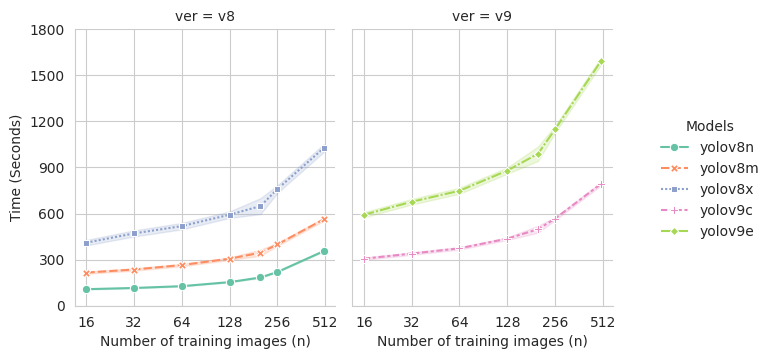

In [30]:
sns.set_style("whitegrid")
g = sns.FacetGrid(data,
                  col="ver",
                #   row="location",
                  margin_titles=True,
                  sharey="all",)
g.map_dataframe(sns.lineplot,
                x="n", y="time",
                hue="model", style="model",
                hue_order=["yolov8n", "yolov8m", "yolov8x", "yolov9c", "yolov9e"],
                style_order=["yolov8n", "yolov8m", "yolov8x", "yolov9c", "yolov9e"],
                err_style="band",
                errorbar=("se", 2),
                markers=True,
                palette="Set2",)
g.set(
    xscale="log",
    xticks=[2**i for i in range(4, 10)],
    xticklabels=[2**i for i in range(4, 10)],
    xlabel="Number of training images (n)",
    # y as minutes from seconds
    yticks=[300*i for i in range(0, 7)],
    yticklabels=[300*i for i in range(0, 7)], 
    ylabel="Time (Seconds)",)
g.add_legend(title="Models")
g.figure.set_size_inches(8, 4)
g.figure.savefig(os.path.join("out", "b0313", "fig5_time.png"), dpi=300)


In [31]:
data.groupby(["model", "n"]).aggregate(["mean", "std"])

/localscratch/ipykernel_258896/443641764.py:1: FutureWarning: ['location', 'ver'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby(["model", "n"]).aggregate(["mean", "std"])


time             params     
                    mean         std   mean  std
model   n                                       
yolov8m 16    215.757354   74.486604   25.9  0.0
        32    235.690149   74.369456   25.9  0.0
        64    264.843455   78.647578   25.9  0.0
        128   306.175645   84.063158   25.9  0.0
        200   345.176328   84.653578   25.9  0.0
        256   399.171403   88.524655   25.9  0.0
        500   561.771972   91.123517   25.9  0.0
yolov8n 16    107.738247   22.314643    3.2  0.0
        32    115.572293   21.300802    3.2  0.0
        64    127.314196   21.398054    3.2  0.0
        128   153.754812   18.529415    3.2  0.0
        200   183.823600   16.755191    3.2  0.0
        256   219.604226   17.567854    3.2  0.0
        500   355.048896   33.157870    3.2  0.0
yolov8x 16    410.421272  179.200831   68.2  0.0
        32    470.882886  202.246014   68.2  0.0
        64    518.207108  211.569898   68.2  0.0
        128   592.800875  215.851866   68.2  0.0
        200   648.359064  214.398872   68.2  0.0
        256   759.412520  227.867733   68.2  0.0
        500  1025.044343  236.991721   68.2  0.0
yolov9c 16    306.064251   81.027596   25.3  0.0
        32    339.469449   82.836924   25.3  0.0
        64    373.395192   84.151471   25.3  0.0
        128   436.464877   87.330519   25.3  0.0
        200   497.576754   95.801675   25.3  0.0
        256   566.546888   91.501473   25.3  0.0
        500   793.876035  102.730789   25.3  0.0
yolov9e 16    592.131213  174.744098   57.3  0.0
        32    676.604266  188.619454   57.3  0.0
        64    748.141915  201.783085   57.3  0.0
        128   879.431797  207.443466   57.3  0.0
        200   989.171737  200.407500   57.3  0.0
        256  1147.146139  208.422519   57.3  0.0
        500  1593.722889  220.144975   57.3  0.0